# Latency analysis

In [1]:
recording_files = [
    "2020-07-21T18-45-26",
    "2020-07-21T17-54-09",
    "2020-07-21T18-56-49",
]

axislim_margin = 0.03

In [2]:
import os

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from ptinsight.common.latency import calculate_latencies
from ptinsight.common.plotting import plot_init, plot_format, plot_subplot, plot_save, add_relative_time

In [3]:
def select_job(data, job):
    """Get all rows for a specific job"""
    return data[data["job"] == job]

## Preprocessing

In [4]:
plot_init()

datas = {}
jobs = set()

# did = data id since id is a builtin
for did in sorted(recording_files):
    data = pd.read_csv(f"recordings/{did}.csv")
    add_relative_time(data, "ingress_ingestion_timestamp")
    calculate_latencies(data)
    
    jobs.update(data["job"])
    
    datas[did] = {
        "data": data,
    }
    
jobs = sorted(jobs)
n_jobs = len(jobs)
n_data = len(recording_files)

latency_cols = [col for col in datas[did]["data"] if col.startswith("latency")]
latency_cols_no_e2e = [col for col in latency_cols if not "end_to_end" in col]

max_latency = max([info["data"][latency_cols_no_e2e].max().max() for info in datas.values()])
max_t = max([info["data"]["t"].max() for info in datas.values()])

## Descriptive statistics of latencies per job

In [5]:
for did, info in datas.items():
    display(Markdown(f"### ID: {did}"))
    for job in jobs:
        display(Markdown(f"#### Job: {job}"))
        display(select_job(info["data"], job)[latency_cols].describe())

### ID: 2020-07-21T17-54-09

#### Job: delay-statistics

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,544.000000,544.000000,544.000000,544.000000
mean,4102.908088,44.742647,3971.722426,86.443015
std,1511.159014,49.681934,1502.438685,74.332663
min,1112.000000,4.000000,1071.000000,4.000000
25%,2853.000000,19.000000,2715.500000,38.000000
50%,4113.500000,33.000000,3978.500000,76.000000
75%,5364.250000,52.000000,5221.500000,117.250000
max,7658.000000,601.000000,7546.000000,594.000000


#### Job: emergency-stop-streaming

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,204.000000,204.000000,204.000000,204.000000
mean,71844.671569,48.352941,71780.362745,15.955882
std,84421.633020,43.861997,84425.069175,36.405935
min,275.000000,8.000000,236.000000,2.000000
25%,5343.500000,23.000000,5271.750000,3.000000
50%,41286.000000,38.500000,41263.500000,6.500000
75%,111009.250000,61.000000,110982.000000,15.000000
max,298585.000000,431.000000,298568.000000,426.000000


#### Job: emergency-stop-table

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,260.000000,260.000000,260.000000,260.000000
mean,130985.488462,48.215385,130915.515385,21.757692
std,110480.040958,43.184436,110480.645417,50.971024
min,324.000000,5.000000,279.000000,2.000000
25%,16601.750000,23.000000,16475.250000,4.000000
50%,107570.500000,39.500000,107523.500000,7.000000
75%,261556.750000,61.000000,261526.500000,21.000000
max,299231.000000,431.000000,299217.000000,658.000000


#### Job: vehicle-count

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,758.000000,758.000000,758.000000,758.000000
mean,3126.287599,53.007916,2992.217678,81.062005
std,1429.445582,50.640833,1426.164295,81.812704
min,480.000000,5.000000,382.000000,5.000000
25%,1930.250000,26.000000,1803.750000,43.000000
50%,3161.000000,43.000000,3000.500000,72.000000
75%,4287.750000,63.000000,4156.250000,95.750000
max,5825.000000,562.000000,5727.000000,761.000000


### ID: 2020-07-21T18-45-26

#### Job: delay-statistics

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,497.000000,497.000000,497.000000,497.000000
mean,4574.229376,22.484909,4470.573441,81.171026
std,1511.256012,55.511589,1510.573852,80.672357
min,1635.000000,3.000000,1551.000000,4.000000
25%,3280.000000,5.000000,3197.000000,32.000000
50%,4531.000000,8.000000,4398.000000,65.000000
75%,5896.000000,12.000000,5738.000000,106.000000
max,8271.000000,525.000000,8200.000000,617.000000


#### Job: emergency-stop-streaming

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,377.000000,377.000000,377.000000,377.000000
mean,55105.586207,24.965517,55066.925729,13.694960
std,43747.983851,53.520640,43744.728183,45.529974
min,1116.000000,3.000000,768.000000,1.000000
25%,10604.000000,7.000000,10562.000000,3.000000
50%,46829.000000,10.000000,46769.000000,4.000000
75%,90572.000000,14.000000,90540.000000,7.000000
max,142348.000000,417.000000,142178.000000,457.000000


#### Job: emergency-stop-table

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,368.000000,368.000000,368.000000,368.000000
mean,78352.472826,25.402174,78314.010870,13.059783
std,48903.314234,54.096958,48896.389252,25.970570
min,1155.000000,3.000000,918.000000,2.000000
25%,25401.500000,7.000000,25385.500000,3.000000
50%,110079.500000,10.000000,110051.000000,5.000000
75%,114845.750000,15.000000,114804.750000,11.000000
max,136147.000000,417.000000,136129.000000,190.000000


#### Job: vehicle-count

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,780.000000,780.000000,780.000000,780.000000
mean,4144.911538,25.546154,4059.957692,59.407692
std,1455.906722,56.568898,1454.168282,55.807255
min,1225.000000,3.000000,1184.000000,2.000000
25%,2903.500000,7.000000,2839.000000,30.000000
50%,4225.000000,10.000000,4145.500000,52.000000
75%,5396.250000,15.000000,5291.500000,71.000000
max,7487.000000,530.000000,7316.000000,578.000000


### ID: 2020-07-21T18-56-49

#### Job: delay-statistics

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,487.000000,487.000000,487.000000,487.000000
mean,7232.207392,39.406571,7091.338809,101.462012
std,3027.249561,29.908760,3023.376363,80.784592
min,1364.000000,7.000000,1200.000000,4.000000
25%,4657.000000,21.000000,4496.000000,40.000000
50%,7257.000000,32.000000,7098.000000,82.000000
75%,9752.000000,46.500000,9613.500000,148.500000
max,13475.000000,231.000000,13346.000000,432.000000


#### Job: emergency-stop-streaming

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,197.000000,197.000000,197.000000,197.000000
mean,65408.395939,46.228426,65349.081218,13.086294
std,81147.059275,42.516547,81145.850051,19.336907
min,120.000000,10.000000,75.000000,2.000000
25%,928.000000,26.000000,874.000000,3.000000
50%,23485.000000,37.000000,23421.000000,6.000000
75%,103911.000000,52.000000,103838.000000,14.000000
max,290481.000000,393.000000,290398.000000,125.000000


#### Job: emergency-stop-table

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,248.000000,248.000000,248.000000,248.000000
mean,67696.875000,44.951613,67633.451613,18.471774
std,68045.156893,39.025966,68049.510611,35.744584
min,282.000000,10.000000,221.000000,2.000000
25%,5973.250000,25.000000,5902.500000,4.000000
50%,41719.500000,37.000000,41672.500000,8.000000
75%,120607.000000,51.250000,120560.750000,21.000000
max,241704.000000,393.000000,241668.000000,460.000000


#### Job: vehicle-count

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,727.000000,727.000000,727.000000,727.000000
mean,5929.387895,43.955983,5770.896836,114.535076
std,2982.477810,33.037723,2975.466933,66.789696
min,688.000000,6.000000,523.000000,6.000000
25%,3401.500000,25.000000,3218.000000,62.500000
50%,5925.000000,36.000000,5761.000000,109.000000
75%,8507.500000,51.000000,8328.500000,161.000000
max,11675.000000,393.000000,11295.000000,368.000000


In [6]:
for did, info in datas.items():
    print(f"ID: {did}")
    for job in jobs:
        if "emergency-stop" in job:
            print(f"{job}: n={select_job(info['data'], job)['t'].count()}")

ID: 2020-07-21T17-54-09
emergency-stop-streaming: n=204
emergency-stop-table: n=260
ID: 2020-07-21T18-45-26
emergency-stop-streaming: n=377
emergency-stop-table: n=368
ID: 2020-07-21T18-56-49
emergency-stop-streaming: n=197
emergency-stop-table: n=248


## Latency distribution per job

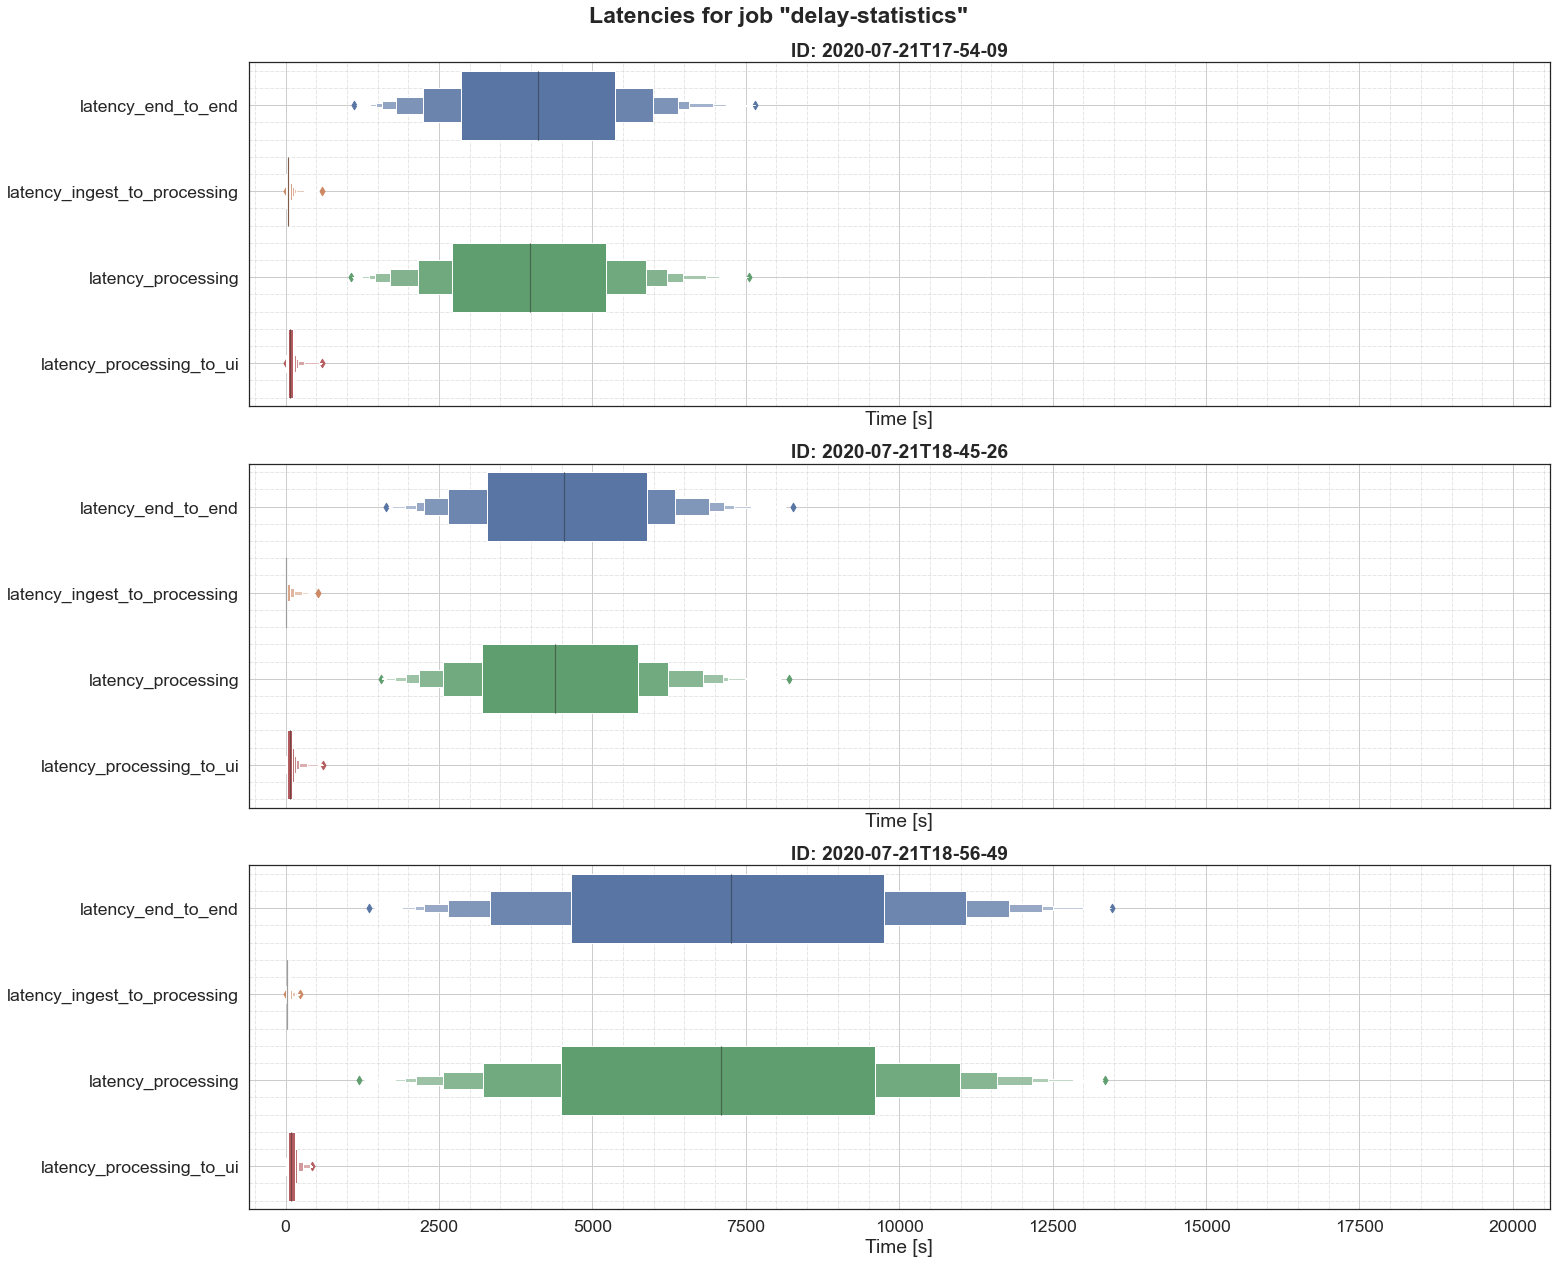

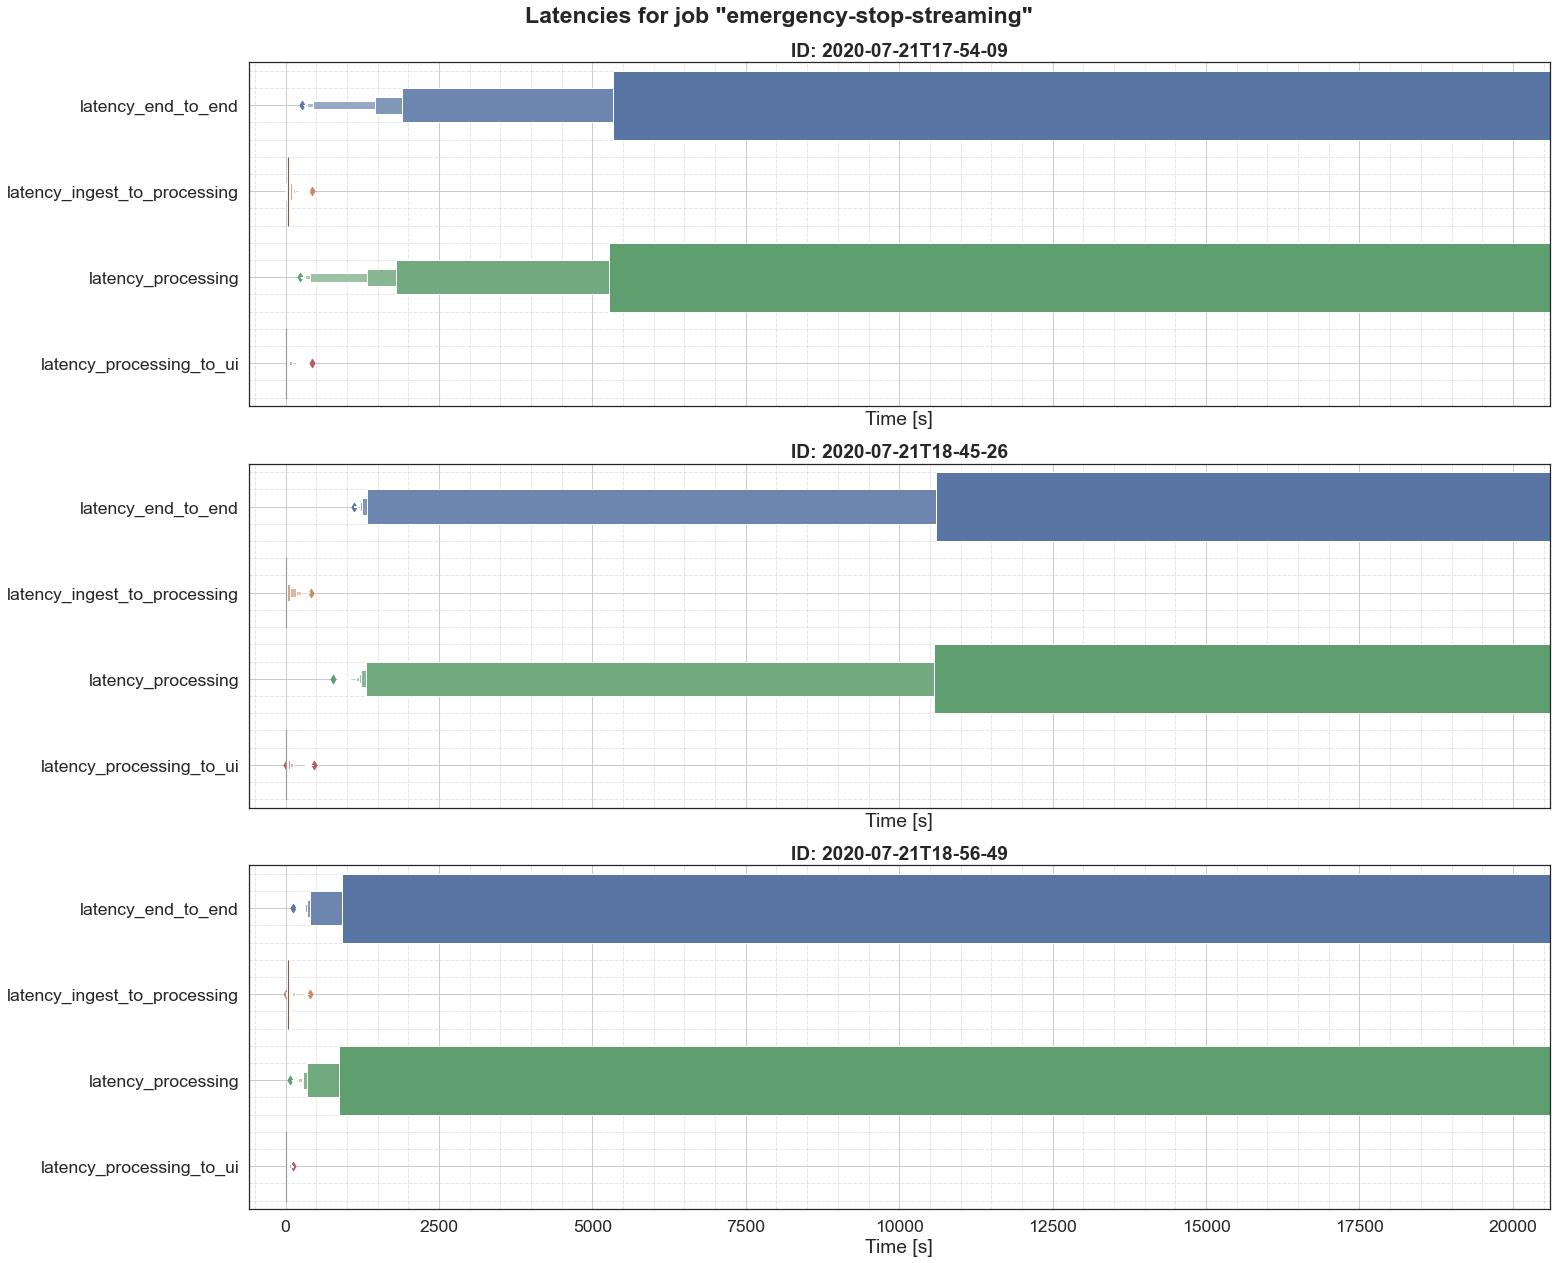

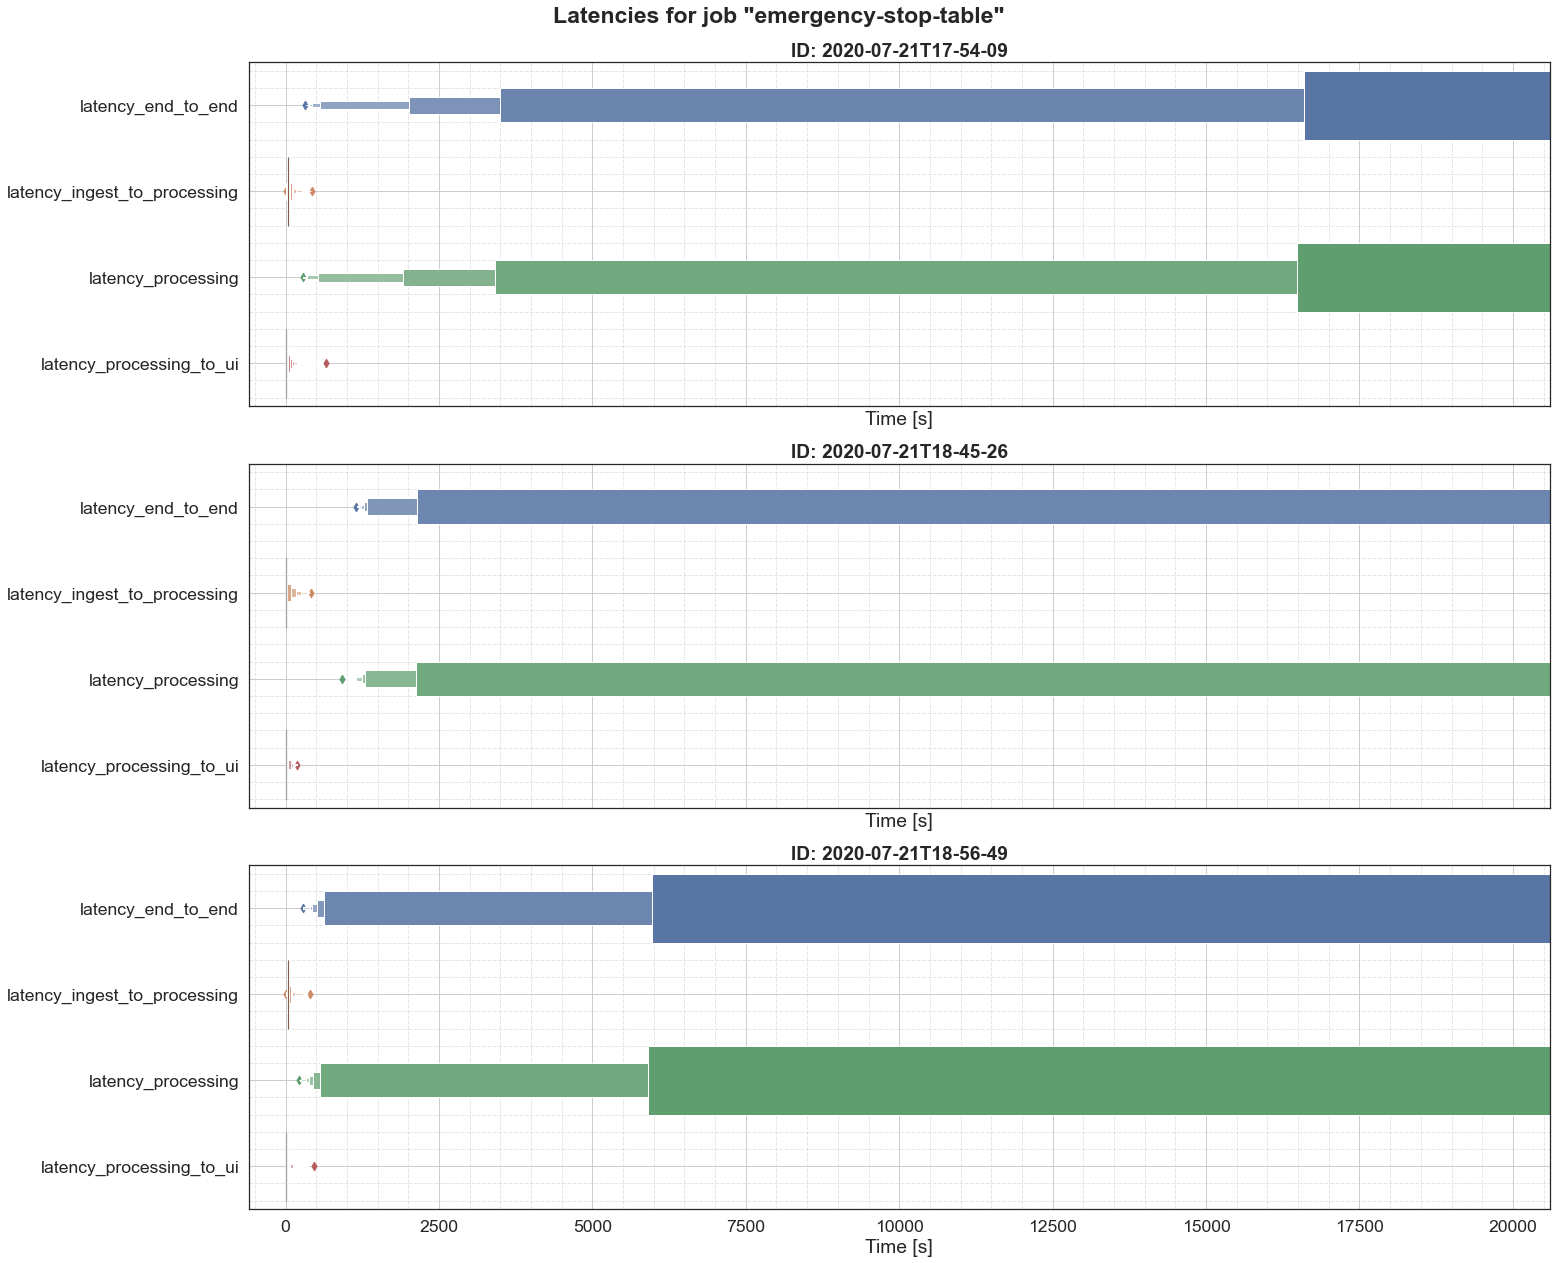

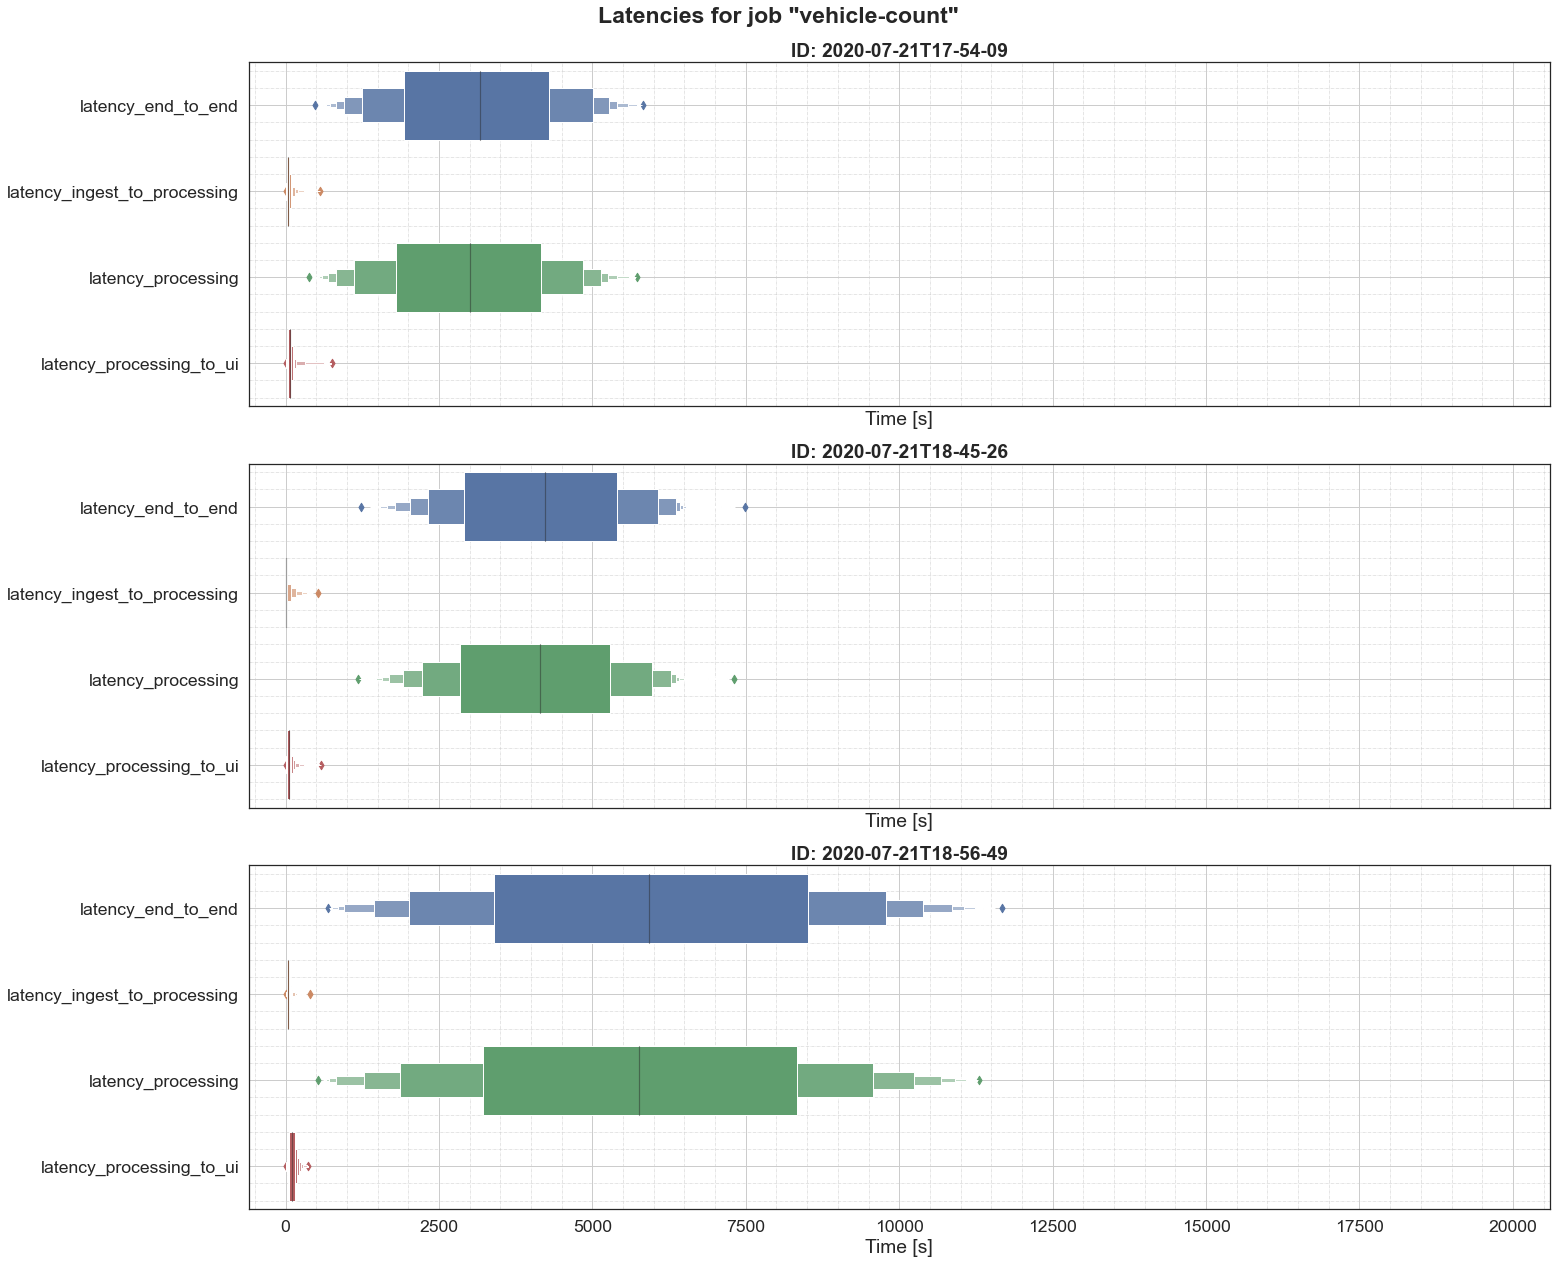

In [7]:
def plot_latency_distribution():
    latency_lim = min(20000, max_latency)
    for job in jobs:
        fig, axs = plot_subplot(n_data)
        
        fig.suptitle(f"Latencies for job \"{job}\"")
        
        for i, (did, info) in enumerate(datas.items()):
            ax = axs[i]

            sb.boxenplot(data=select_job(info["data"], job)[latency_cols], orient="h", ax=ax)
            ax.set_xlim([-axislim_margin * latency_lim, latency_lim * (1 + axislim_margin)])
            ax.set_title(f"ID: {did}")
            ax.set_xlabel("Time [s]")
            if i+1 == len(jobs):
                ax.set_xlabel("Latency [ms]")
        
        plot_format(fig, space_factor=2)
        plot_save(f"latency_distribution_{job}")
    
plot_latency_distribution()

## Latency over time per job

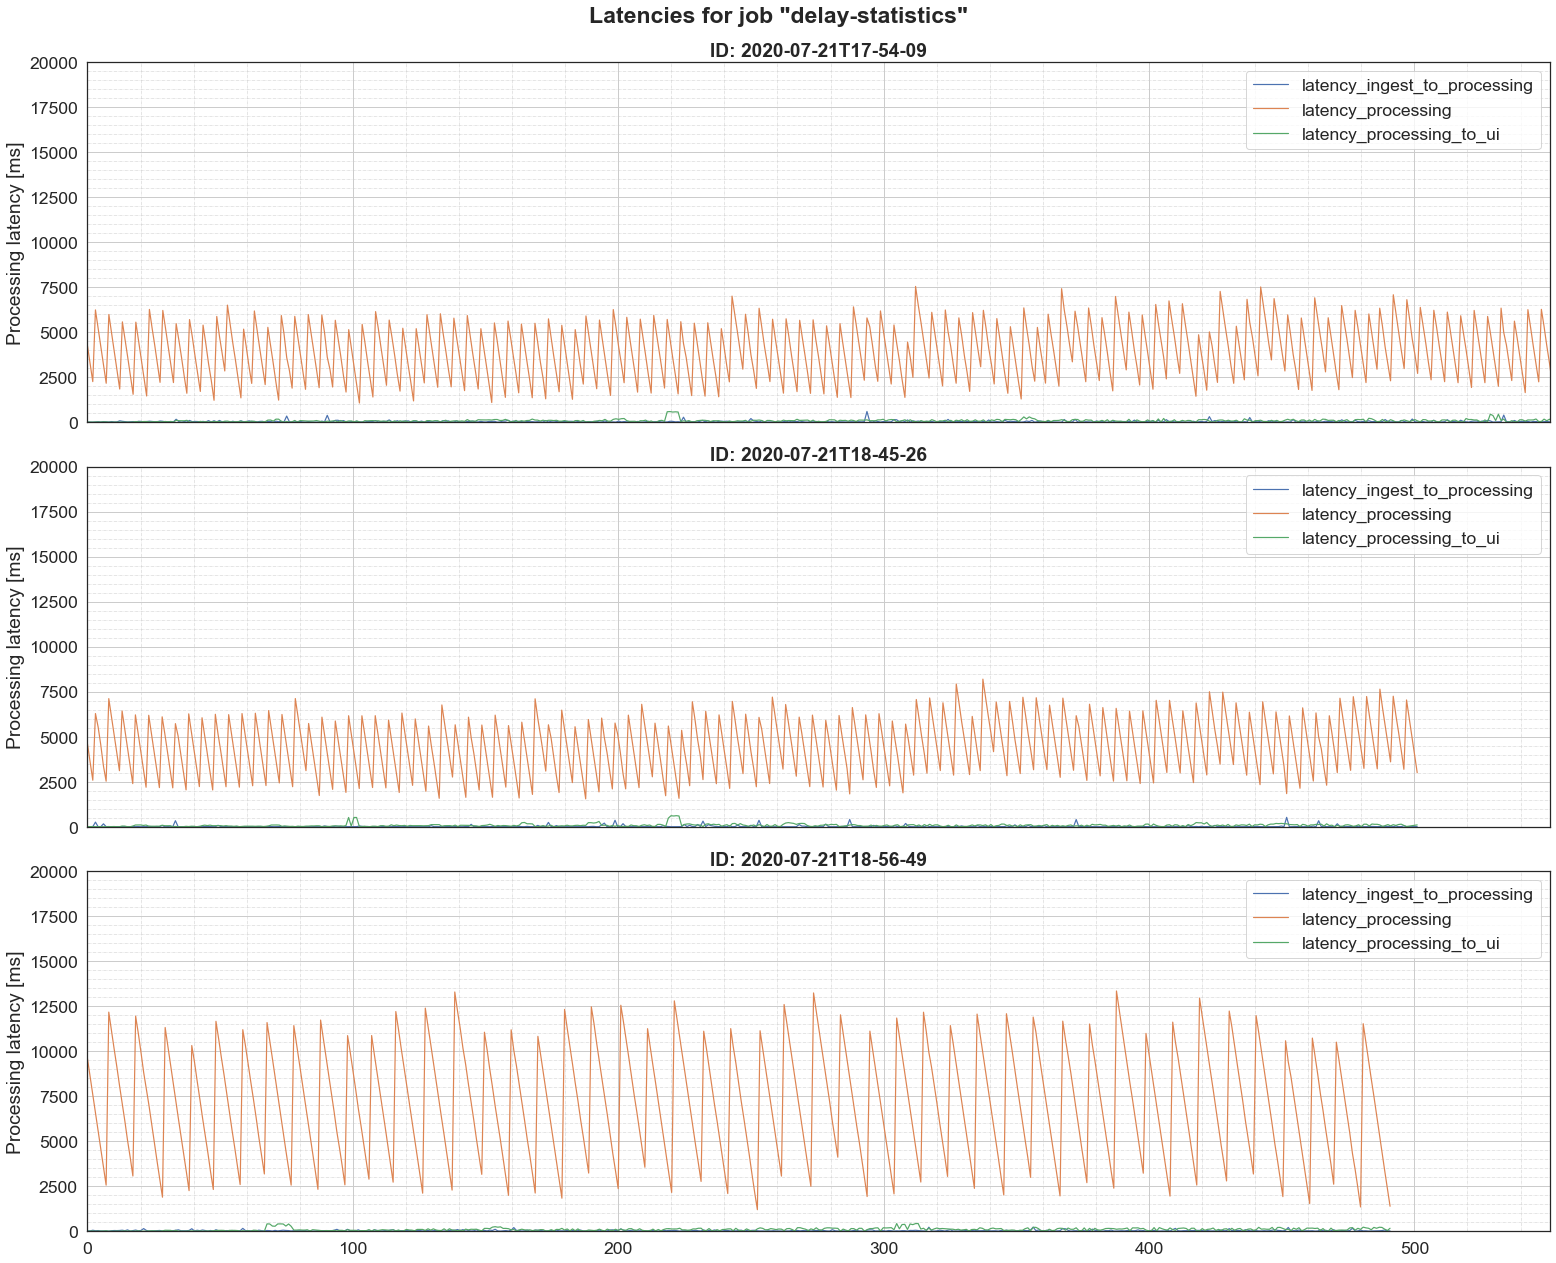

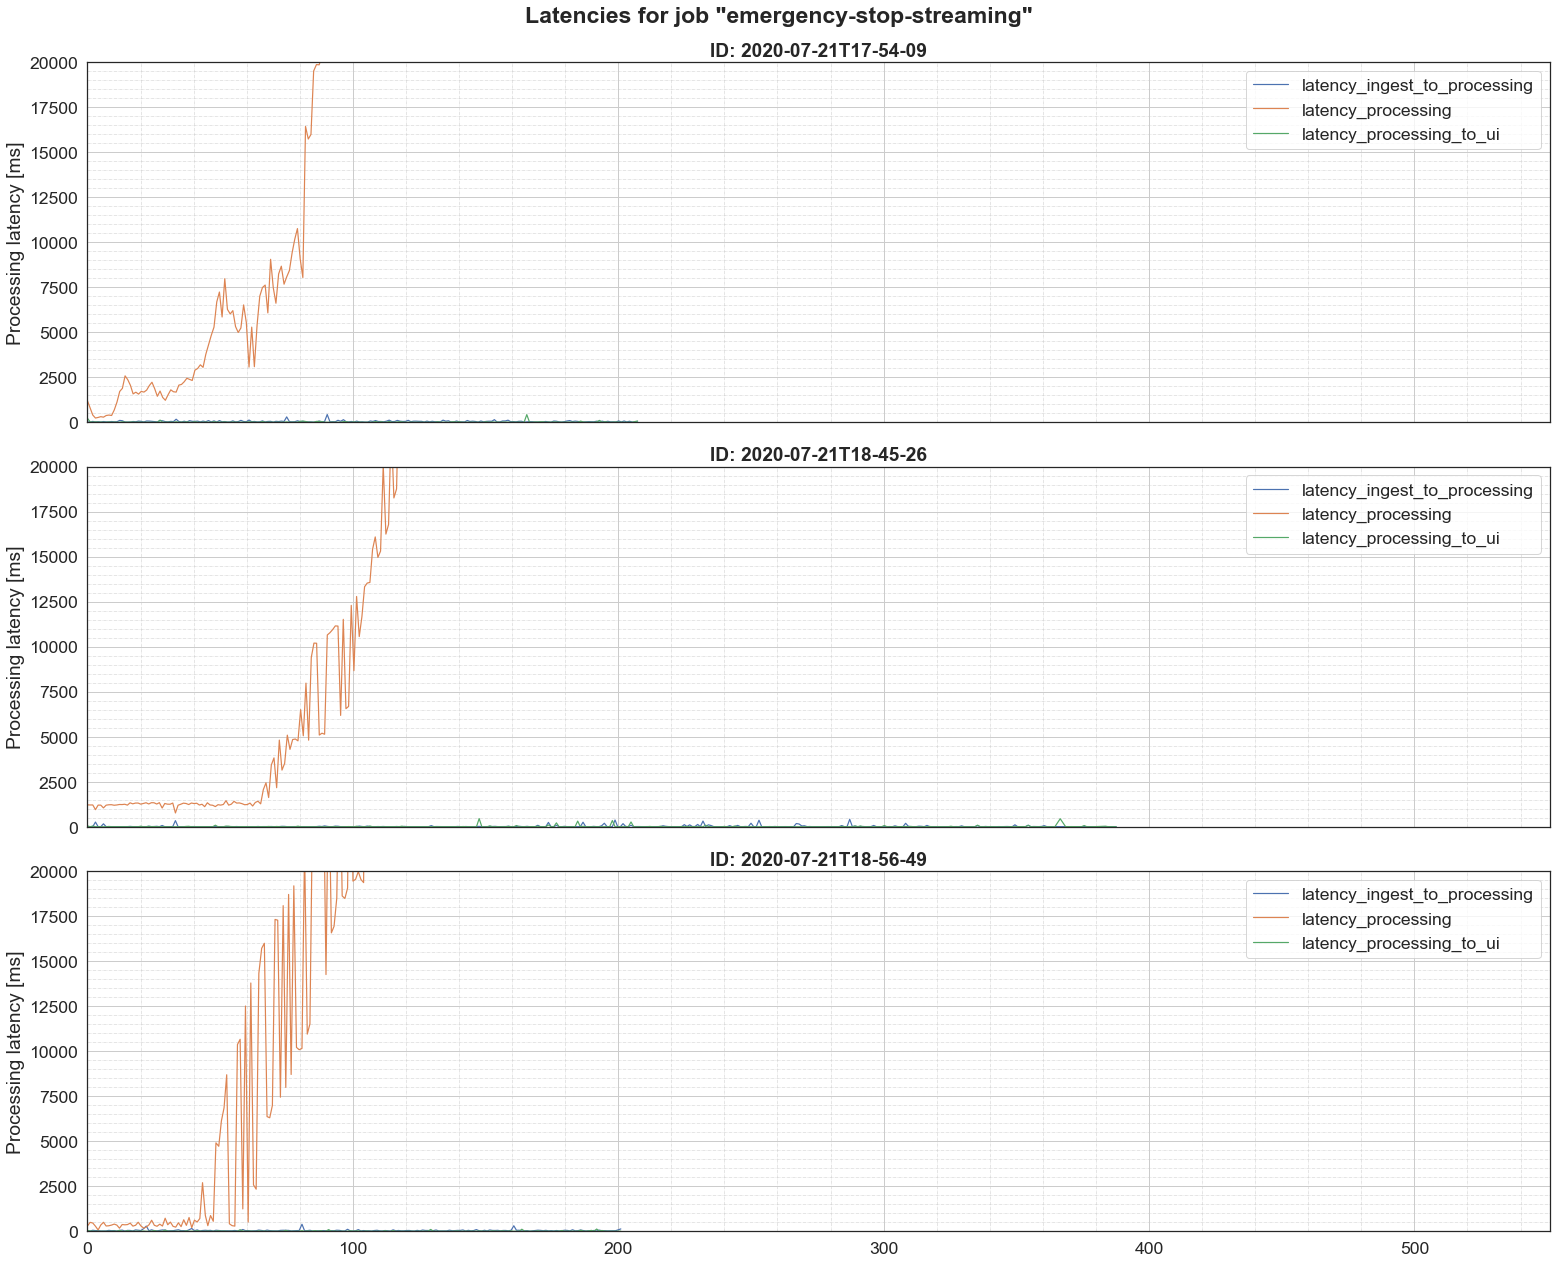

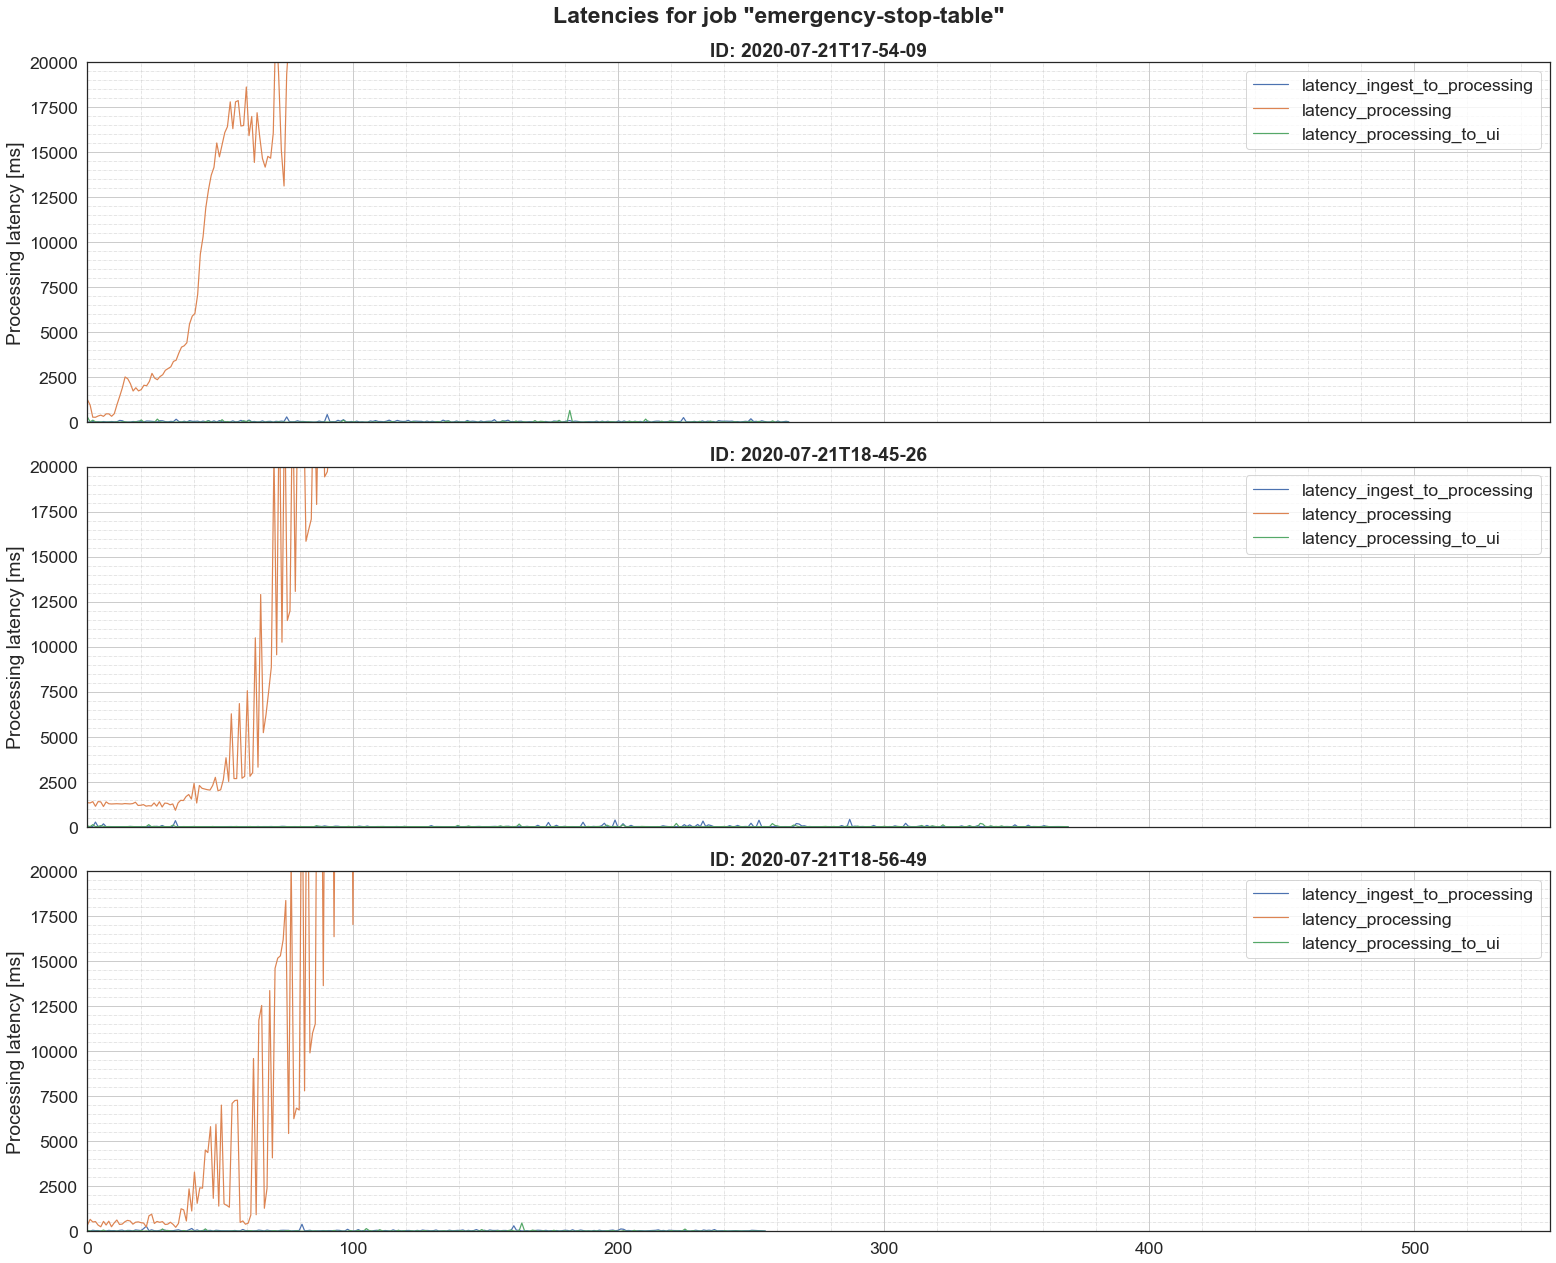

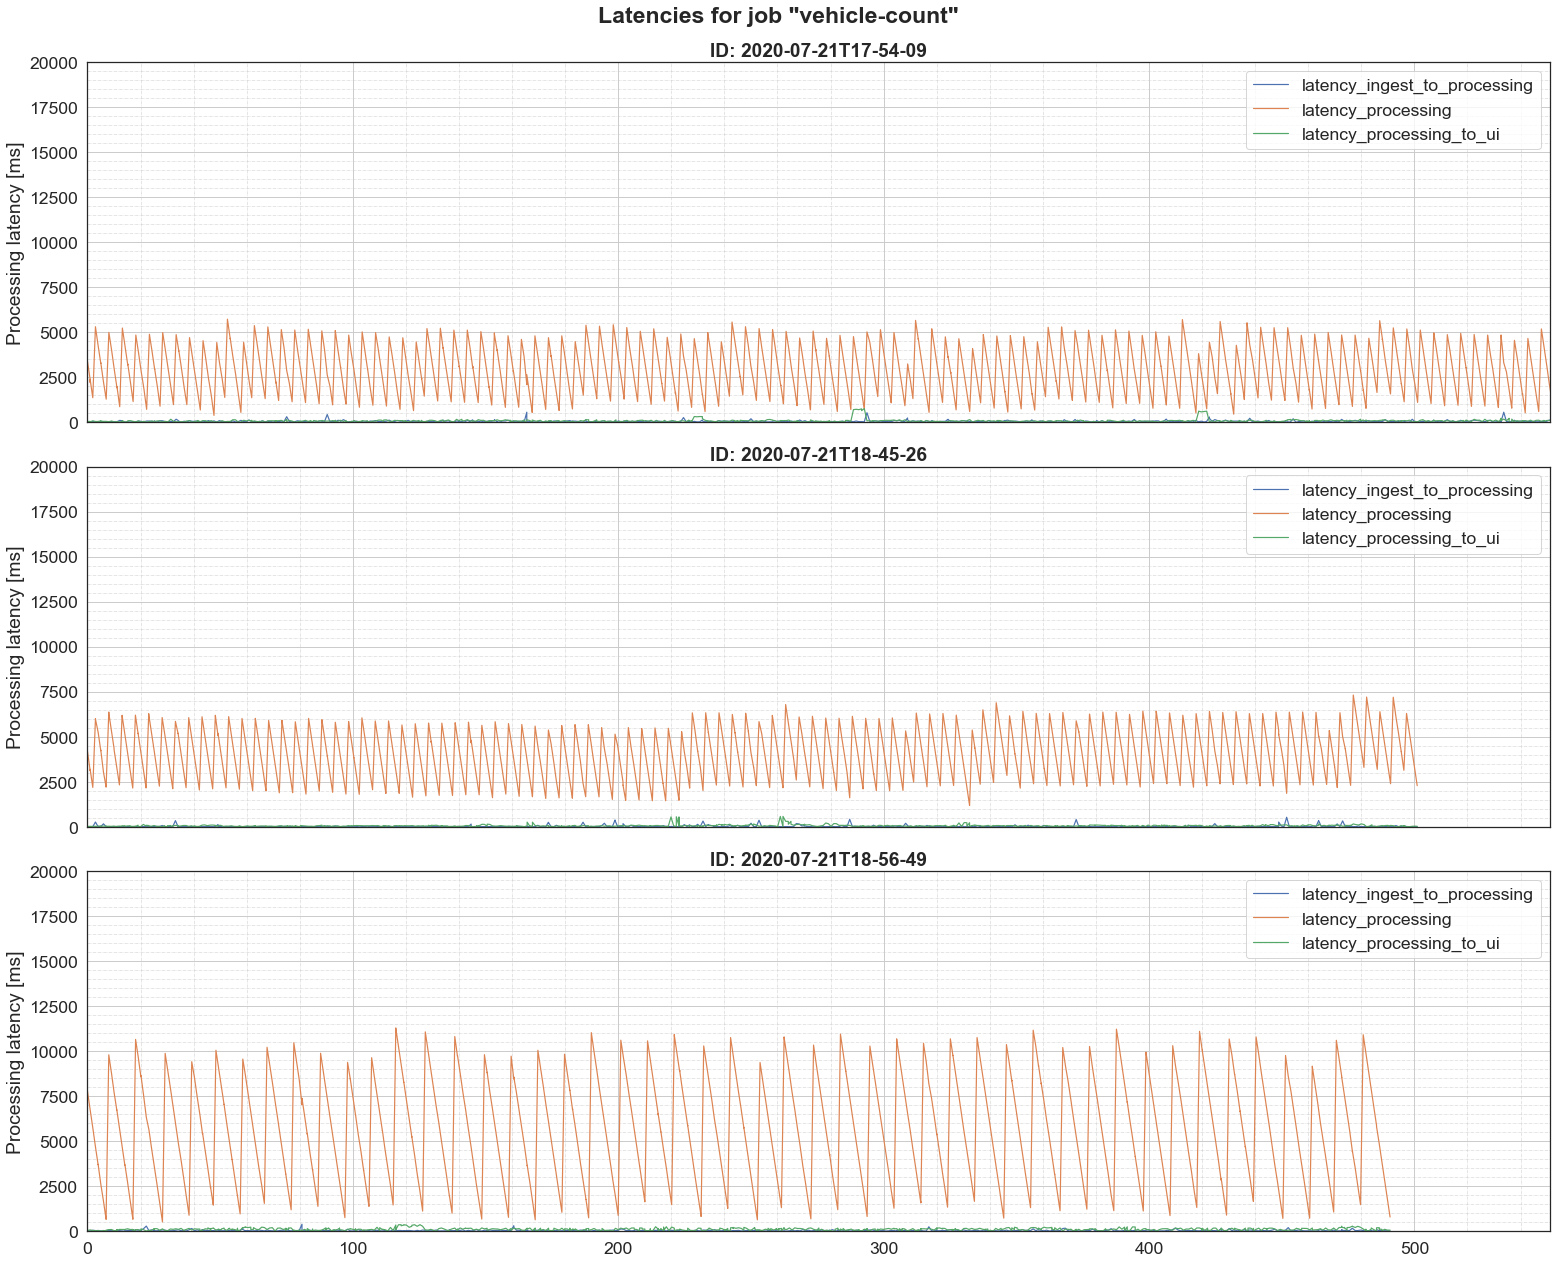

In [8]:
def plot_latency_over_time():
    latency_lim = min(20000, max_latency)
    for t_lim in [int(min(8000, max_t))]:
        for job in jobs:
            fig, axs = plot_subplot(n_data)

            fig.suptitle(f"Latencies for job \"{job}\"")
            
            for i, (did, info) in enumerate(datas.items()):
                job_data = select_job(info["data"], job)
                ax = axs[i]

                for col in latency_cols_no_e2e:
                    ax.plot(job_data["t"], job_data[col], label=col)
                        
                ax.set_xlim([0, t_lim])
                ax.set_ylim([0, latency_lim])
                ax.set_ylabel("Processing latency [ms]")
                ax.set_title(f"ID: {did}")
                ax.legend()
                if i+1 == len(jobs):
                    ax.set_xlabel("Time [s]")

            plot_format(fig, space_factor=2)
            plot_save(f"latency_trend_{job}_t{max_t}")
    
plot_latency_over_time()